# Analyzing Data from a Television Show

## Background

In this notebook, we look at a dataset of episodes from the American version of the television show "The Office", and try to understand how the popularity and quality of the series varied over time. We use the following dataset: <code>datasets/office_episodes.csv</code>, on Kaggle <a href="https://www.kaggle.com/nehaprabhavalkar/the-office-dataset">here</a>.</p>

<p>This dataset contains information on a variety of characteristics of each episode. In detail, these are:

## Solution

In the final cell of this notebook, we display an informative plot of episode data, which involves working with several different variables, including the episode number, the viewership, the fan rating, and guest appearances.

In intermediate steps, we process and analyze data in these ways:
- Read in episode data from a .csv to a pandas dataframe
- Find the most-watched episode 
- Create a color scheme to mark episode ratings
- Define a point sizing system, such that episodes with guest appearances have a marker size of 250 and episodes without are sized 25
- Title for the plot and axes
- Finally, we plot and show a matplotlib scatter plot with the following attributes:
    - Each episode's episode number plotted along the x-axis
    - Each episode's viewership (in millions) plotted along the y-axis
    - A color scheme reflecting the scaled ratings (not the regular ratings) of each episode, such that:
            - Ratings < 0.25 are colored "red"
            - Ratings >= 0.25 and < 0.50 are colored "orange"
            - Ratings >= 0.50 and < 0.75 are colored "lightgreen"
            - Ratings >= 0.75 are colored "darkgreen"
        - A title, reading "Popularity, Quality, and Guest Appearances on the Office"
        - An x-axis label reading "Episode Number"
        - A y-axis label reading "Viewership (Millions)"

In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
office = pd.read_csv("datasets/office_episodes.csv")
office.set_index("episode_number")

,season,episode_title,description,ratings,votes,viewership_mil,duration,release_date,guest_stars,director,writers,has_guests,scaled_ratings
episode_number,,,,,,,,,,,,,
0,1,Pilot,The premiere episode introduces the boss and s...,7.5,4936,11.20,23,2005-03-24,NaN,Ken Kwapis,Ricky Gervais |Stephen Merchant and Greg Daniels,False,0.28125
1,1,Diversity Day,Michael's off color remark puts a sensitivity ...,8.3,4801,6.00,23,2005-03-29,NaN,Ken Kwapis,B. J. Novak,False,0.53125
2,1,Health Care,Michael leaves Dwight in charge of picking the...,7.8,4024,5.80,22,2005-04-05,NaN,Ken Whittingham,Paul Lieberstein,False,0.37500
3,1,The Alliance,"Just for a laugh, Jim agrees to an alliance wi...",8.1,3915,5.40,23,2005-04-12,NaN,Bryan Gordon,Michael Schur,False,0.46875
4,1,Basketball,Michael and his staff challenge the warehouse ...,8.4,4294,5.00,23,2005-04-19,NaN,Greg Daniels,Greg Daniels,False,0.56250
...,...,...,...,...,...,...,...,...,...,...,...,...,...
183,9,Stairmageddon,Dwight shoots Stanley with a bull tranquilizer...,8.0,1985,3.83,22,2013-04-11,NaN,Matt Sohn,Dan Sterling,False,0.43750
184,9,Paper Airplane,The employees hold a paper airplane competitio...,8.0,2007,3.25,22,2013-04-25,NaN,Jesse Peretz,Halsted Sullivan | Warren Lieberstein,False,0.43750
185,9,Livin' the Dream,Dwight becomes regional manager after Andy qui...,9.0,2831,3.51,42,2013-05-02,Michael Imperioli,Jeffrey Blitz,Niki Schwartz-Wright,True,0.75000


In [2]:
# find most watched ep # iterate over df col "viewership_mil" & find max val
most_views = 0.0
#top_star = ""
for i in range(188):
    x = office.loc[i, "viewership_mil"]
    if x >= most_views:
        most_views = x
        top_star_mult = office.loc[i, "guest_stars"]


top_star = ""
for n in top_star_mult:
    if n != ",":
        top_star += n
    if n == ",":
        break
        

In [3]:
# colors for ratings
colorlist = []
for j in range(188):
    scaled_ratings = office.loc[j, "scaled_ratings"]
    curr_color = ""
    if scaled_ratings < 0.25 : curr_color = "red"
    if (scaled_ratings >= 0.25 and scaled_ratings < 0.50) : curr_color = "orange"
    if (scaled_ratings >= 0.50 and scaled_ratings < 0.75) : curr_color = "lightgreen"
    if scaled_ratings >= 0.75 : curr_color = "darkgreen"
    colorlist.append(curr_color)
#print(colorlist)

In [4]:
# size points   - same as color, construct list from each dt pts 
sizes = []
for j in range(188):
    has_guests = office.loc[j, "has_guests"]
    if has_guests == True : sizes.append(250)
    if has_guests == False : sizes.append(25)
#print(sizes)

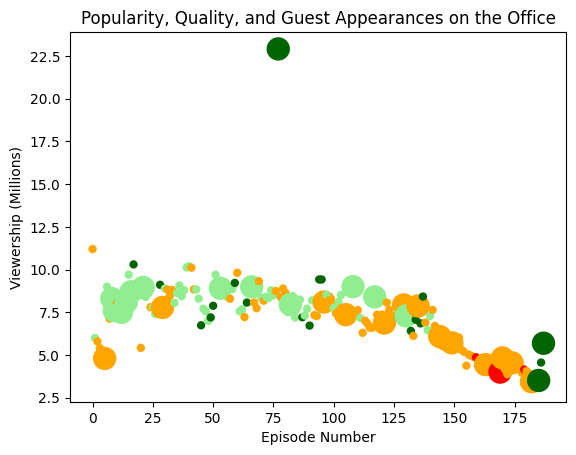

In [5]:
#  gather it all and plot the data
plt.title("Popularity, Quality, and Guest Appearances on the Office")
plt.xlabel("Episode Number")
plt.ylabel("Viewership (Millions)")

#Each episode's episode number plotted along the x-axis
#Each episode's viewership (in millions) plotted along the y-axis
xax = office.loc[:, "episode_number"]
yax = office.loc[:, "viewership_mil"]

plt.rcParams['figure.figsize'] = [11, 7]

plt.scatter(xax, yax, s = sizes, c = colorlist)